In [2]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import prettytable as pt
from matplotlib import pyplot as plt
import os 
import warnings
warnings.filterwarnings("ignore")

###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################

directory = os.path.normpath(os.getcwd() + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata/yielddata.csv"

yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 


In [20]:
data = {
           "valuationDate": "2012-04-30",
           "endOfMonth": True,
           "zeroRates": {
               "analysisDates": [],
               "compounding": "Continuous",
               "frequency": "Annual",
               "dayCounter": "Actual360"
           },
           "baseCurve": {
               "settlementDays": 2,
               "intpMethod": "LOGLINEAR",
               "currency": "TRY",
               "calendar": "Turkey",
               "dayCounter": "Actual360",
               "period": "3M",
               "instruments": {
                   "DEPO": {
                       "businessDayConvention": "ModifiedFollowing",
                       "dayCounter": "Actual360"
                   },
                   "IRS": {
                       "businessDayConvention": "Following",
                       "dayCounter": "Actual360",
                       "frequency": "Annual"
                   },
                   "FRA": {
                       "businessDayConvention": "ModifiedFollowing",
                       "dayCounter": "Actual360"
                   }
               }
           },
           "quoteCurve": {
               "settlementDays": 2,
               "intpMethod": "LOGLINEAR",
               "currency": "USD",
               "calendar": "UnitedStates",
               "dayCounter": "Actual360",
               "period": "3M",
               "instruments": {
                   "DEPO": {
                       "businessDayConvention": "Following",
                       "dayCounter": "Actual360"
                   },
                   "IRS": {
                       "businessDayConvention": "Following",
                       "dayCounter": "Actual360",
                       "frequency": "Annual"
                   },
                   "FRA": {
                       "businessDayConvention": "Following",
                       "dayCounter": "Actual360"
                   }
               }
           },
           "collateralCurve": {
               "settlementDays": 2,
               "intpMethod": "LINEAR",
               "currency": "USD",
               "calendar": "UnitedStates",
               "dayCounter": "Actual360",
               "discountRates": "USDZero"
           },
           "yieldCurve": {
               "settlementDays": 2,
               "intpMethod": "LOGLINEAR",
               "currency": "USDTRY",
               "calendar": "Turkey",
               "dayCounter": "Actual360",
               "period": "3M",
               "instruments": {
            "FWD": {
                "businessDayConvention": "ModifiedFollowing",
                "dayCounter": "Actual360"
            },
                   "CCBS": {
                       "businessDayConvention": "ModifiedFollowing",
                       "dayCounter": "Actual360",
                       "collatereal": "TRY"
                   }
               }
           },
         "spot": 1.7572,
         "yieldData": yielddata.to_dict('r')
       }


try:
    result = api.createTask(CalculationType.YIELD_CURVE, data,True)
    result=json.loads(result["result"])
except RhoovaError as e:
    e.printPretty()



In [21]:
zerorates=result.get("zeroRates"),
discountrates=result.get("discountRates")
dates=[]
forwarddates= {}
rhoovayieldcurvedicts = {}
rhoovayieldcurvediscounts = {}
for rhvzr in zerorates[0]:
    rhoovayieldcurvedicts[datetime.strptime(rhvzr.get('date'),'%Y-%m-%d').date()] = rhvzr.get('rate')*100
    dates.append(rhvzr.get('date'))

for rhv in discountrates:
    rhoovayieldcurvediscounts[datetime.strptime(rhv.get('date'), '%Y-%m-%d').date()] = rhv.get('rate')
    

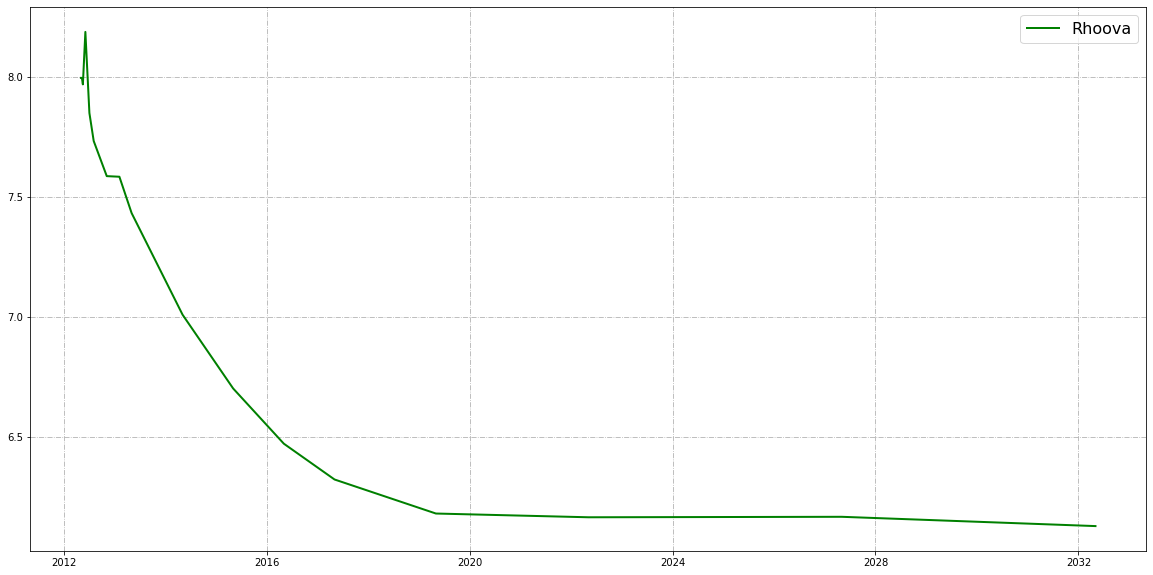

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvedicts.keys())
y = list(rhoovayieldcurvedicts.values())


ax.plot(x,y, 'g', label='Rhoova', linewidth=2)
#
leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

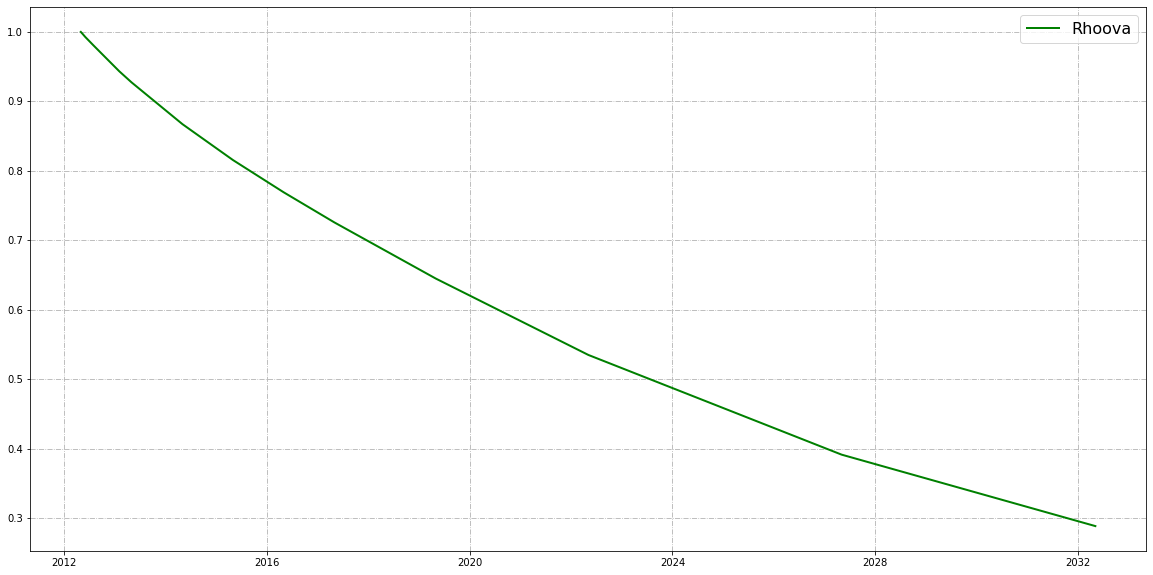

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvediscounts.keys())
y = list(rhoovayieldcurvediscounts.values())

ax.plot(x,y, 'g', label='Rhoova', linewidth=2)

leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

In [24]:
pTable = pt.PrettyTable(['Maturity','Rhoova ZeroRates','Rhoova Discount Rate'])
i=0
for key, val in rhoovayieldcurvedicts.items():
    pTable.add_row([key, val,rhoovayieldcurvediscounts.get(key)])
    i=i+1
pTable.align = 'c'
pTable.float_format = '.6'
print(pTable)

+------------+------------------+----------------------+
|  Maturity  | Rhoova ZeroRates | Rhoova Discount Rate |
+------------+------------------+----------------------+
| 2012-05-03 |     7.997930     |          1           |
| 2012-05-10 |     7.997930     |       0.998446       |
| 2012-05-17 |     7.970784     |       0.996905       |
| 2012-06-04 |     8.189779     |       0.992747       |
| 2012-07-03 |     7.851450     |       0.986784       |
| 2012-08-03 |     7.734427     |       0.980428       |
| 2012-11-05 |     7.587818     |       0.961555       |
| 2013-02-04 |     7.585309     |       0.943306       |
| 2013-05-03 |     7.433571     |       0.927402       |
| 2014-05-05 |     7.009304     |       0.867168       |
| 2015-05-04 |     6.701564     |       0.815442       |
| 2016-05-03 |     6.471078     |       0.769036       |
| 2017-05-03 |     6.321646     |       0.725679       |
| 2019-05-03 |     6.179567     |       0.644842       |
| 2022-05-06 |     6.163932    